In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.25)

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data set for GTechnologies capstone project/fhrw-4uyv.csv", parse_dates=True, infer_datetime_format=True, low_memory=False)
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-07-30T10:32:37.000,47039324,PAINT/PLASTER,11377.0,37-80 64 STREET,64 STREET,ADDRESS,Woodside,The following complaint conditions are still o...,QUEENS,40.748268,-73.899022,NaN,RESIDENTIAL BUILDING,Open
1,2020-07-30T03:58:23.000,47039314,PLUMBING,10009.0,1 HAVEN PLAZA,HAVEN PLAZA,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.727016,-73.976440,NaN,RESIDENTIAL BUILDING,Open
2,2020-07-30T13:39:18.000,47039297,FLOORING/STAIRS,10027.0,244 WEST 122 STREET,WEST 122 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.807607,-73.951111,NaN,RESIDENTIAL BUILDING,Open
3,2020-07-30T16:00:19.000,47035400,GENERAL,11428.0,94-19 210 STREET,210 STREET,ADDRESS,Queens Village,The following complaint conditions are still o...,QUEENS,40.715435,-73.750837,NaN,RESIDENTIAL BUILDING,Open
4,2020-07-30T12:15:18.000,47036744,UNSANITARY CONDITION,10031.0,557 WEST 148 STREET,WEST 148 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.827796,-73.947707,NaN,RESIDENTIAL BUILDING,Open


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177170 entries, 0 to 6177169
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   created_date            object 
 1   unique_key              int64  
 2   complaint_type          object 
 3   incident_zip            float64
 4   incident_address        object 
 5   street_name             object 
 6   address_type            object 
 7   city                    object 
 8   resolution_description  object 
 9   borough                 object 
 10  latitude                float64
 11  longitude               float64
 12  closed_date             object 
 13  location_type           object 
 14  status                  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 706.9+ MB


In [5]:
# removing columns with too many null values
df2 = df[['unique_key','created_date','closed_date','complaint_type','location_type','incident_zip','incident_address','street_name',
         'address_type','city','status','resolution_description','borough','latitude','longitude']]

In [6]:
df2.duplicated().sum() #No Duplicates

0

In [7]:
df2['complaint_type'].value_counts()

HEAT/HOT WATER            1319540
HEATING                    887869
PLUMBING                   726662
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       476308
PAINT - PLASTER            361257
PAINT/PLASTER              358897
ELECTRIC                   314687
NONCONST                   260890
DOOR/WINDOW                214662
WATER LEAK                 202016
GENERAL                    158796
FLOORING/STAIRS            142716
APPLIANCE                  118261
SAFETY                      54044
HPD Literature Request      52830
OUTSIDE BUILDING             7364
ELEVATOR                     7288
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric      

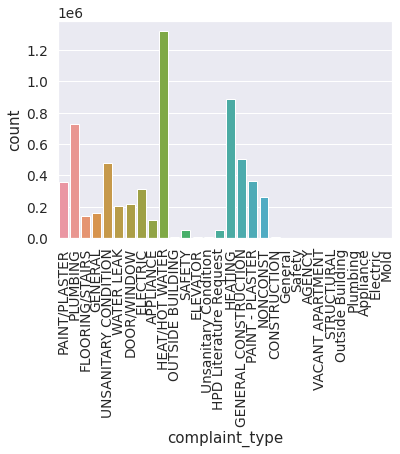

In [8]:
sns.countplot(x='complaint_type',data=df2)
plt.xticks(rotation=90)
plt.show()

In [10]:
# For further analysis, let us find the percentage of open and closed incidents

df_open=df2[df['status']=='Open'].groupby('complaint_type').count().reset_index()[['complaint_type','unique_key']]
df_open=df_open.rename(columns={'unique_key':'No_open_comp'})
df_open

,complaint_type,No_open_comp
0,APPLIANCE,4553
1,CONSTRUCTION,266
2,DOOR/WINDOW,2286
3,ELECTRIC,10067
4,ELEVATOR,95
5,FLOORING/STAIRS,1539
6,GENERAL,1637
7,GENERAL CONSTRUCTION,29623
8,HEAT/HOT WATER,3716
9,HEATING,11396


In [11]:
# For further analysis, let us find the percentage of open and closed incidents

df_closed=df2[df['status']!='Open'].groupby('complaint_type').count().reset_index()[['complaint_type','unique_key']]
df_closed=df_closed.rename(columns={'unique_key':'No_closed_comp'})
df_closed

,complaint_type,No_closed_comp
0,AGENCY,9
1,APPLIANCE,113708
2,Appliance,4
3,CONSTRUCTION,4812
4,DOOR/WINDOW,212376
5,ELECTRIC,304620
6,ELEVATOR,7193
7,Electric,1
8,FLOORING/STAIRS,141177
9,GENERAL,157159


In [12]:
df_final=pd.merge(df_open,df_closed,on='complaint_type')
df_final

,complaint_type,No_open_comp,No_closed_comp
0,APPLIANCE,4553,113708
1,CONSTRUCTION,266,4812
2,DOOR/WINDOW,2286,212376
3,ELECTRIC,10067,304620
4,ELEVATOR,95,7193
5,FLOORING/STAIRS,1539,141177
6,GENERAL,1637,157159
7,GENERAL CONSTRUCTION,29623,471240
8,HEAT/HOT WATER,3716,1315824
9,HEATING,11396,876473


In [14]:
df_final['percentage']=abs((df_final['No_open_comp']-df_final['No_closed_comp'])/df_final['No_closed_comp']*100)
df_final=df_final.sort_values(by='percentage',ascending=False)
df_final

,complaint_type,No_open_comp,No_closed_comp,percentage
8,HEAT/HOT WATER,3716,1315824,99.717591
14,PAINT/PLASTER,3075,355822,99.135804
16,SAFETY,493,53551,99.079382
12,OUTSIDE BUILDING,75,7289,98.971052
6,GENERAL,1637,157159,98.958380
2,DOOR/WINDOW,2286,212376,98.923607
19,WATER LEAK,2174,199842,98.912141
5,FLOORING/STAIRS,1539,141177,98.909879
17,UNSANITARY CONDITION,5710,470598,98.786650
9,HEATING,11396,876473,98.699789


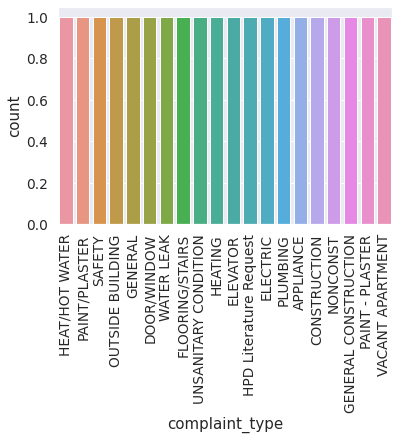

In [17]:
sns.countplot(x='complaint_type',data=df_final[['complaint_type','percentage']])
plt.xticks(rotation=90)
plt.show()

In [18]:
# So we can see that the Department is able to resolve more than 95 percent of the complaints. 
# So it needs to focus on the incidents that occur in large number.

# So the department must focus on HEAT/HOT WATER  complaints